# Post-process of calibration

Input
- `dataout/cmip6_normalized_1.csv`
    Normalized CMIP6 data from `010_cmip6_preprocess.ipynb`
- `dataout/parms_calib.csv`
    Calibrated parameters from `020_calibration.ipynb`

Output image data
- `image/image/n-t__IPSL-CM6A-LR.png`
    ΔN–ΔT relationship of an example CMIP6 model
- `image/image/n-t__<source_id>.pdf`
    same as the above for each of 46 CMIP6 models
- `image/tcr_deviation.png` TCR Examination

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl

In [2]:
# mce is available in https://github.com/tsutsui1872/mce 
sys.path.append('../mce')

In [3]:
from src.tlm import DriverMCE # depends on mce module
from src.plot import MyPlot as MyPlotBase # depends on mce module

## Read results

Output of 010_cmip6_preprocess.ipynb

Time coordinates are harmonized, but initial times are not aligned if branch times are different between abrupt-4xCO2 and 1pctCO2.

In [4]:
df_cmip6_norm1 = (
    pd.read_csv('./dataout/cmip6_normalized_1.csv', index_col=[0, 1, 2])
    .rename(columns=float)
)
df_cmip6_norm1

0.5       1.5       2.5       3.5    \
ACCESS-CM2  rtnt 1pctCO2       0.114668 -0.261170  0.364576  0.088614   
                 abrupt-4xCO2  7.384659  6.016853  5.279721  4.393673   
                 piControl    -0.045634  0.069533  0.033489 -0.003574   
            tas  1pctCO2       0.054810  0.026279 -0.027704  0.069290   
                 abrupt-4xCO2  1.077539  2.020234  2.329260  2.751447   
...                                 ...       ...       ...       ...   
UKESM1-0-LL rtnt abrupt-4xCO2  6.642358  5.841489  6.081244  5.399344   
                 piControl    -0.389239 -0.103244  0.566915 -0.098268   
            tas  1pctCO2       0.278635  0.140545  0.139373  0.124382   
                 abrupt-4xCO2  1.592799  2.120007  2.477257  3.003281   
                 piControl     0.356997  0.102347  0.117881  0.199185   

                                  4.5       5.5       6.5       7.5    \
ACCESS-CM2  rtnt 1pctCO2      -0.240797  0.032865  0.120728 -0.226226   
                 abrupt-4xCO2  5.090981  4.623253  4.417217  3.851686   
                 piControl    -0.040072 -0.041262 -0.376436 -0.301819   
            tas  1pctCO2       0.099759 -0.006149  0.038062  0.149160   
                 abrupt-4xCO2  2.818698  3.189038  3.482845  3.655235   
...                                 ...       ...       ...       ...   
UKESM1-0-LL rtnt abrupt-4xCO2  4.894980  4.545263  4.808677  4.775186   
                 piControl     0.044639 -0.024439 -0.189297  0.313945   
            tas  1pctCO2       0.088125  0.209777  0.235321  0.422771   
                 abrupt-4xCO2  3.480784  3.627754  3.621646  3.835658   
                 piControl     0.099007  0.139270  0.119387 -0.053199   

                                  8.5       9.5    ...  357.5  358.5  359.5  \
ACCESS-CM2  rtnt 1pctCO2       0.477206  0.306030  ...    NaN    NaN    NaN   
                 abrupt-4xCO2  4.005168  3.914475  ...    NaN    NaN    NaN   
                 piControl     0.061253 -0.441146  ...    NaN    NaN    NaN   
            tas  1pctCO2       0.034585  0.050589  ...    NaN    NaN    NaN   
                 abrupt-4xCO2  3.620542  3.825483  ...    NaN    NaN    NaN   
...                                 ...       ...  ...    ...    ...    ...   
UKESM1-0-LL rtnt abrupt-4xCO2  4.019885  4.107933  ...    NaN    NaN    NaN   
                 piControl    -0.125782  0.195047  ...    NaN    NaN    NaN   
            tas  1pctCO2       0.364995  0.319772  ...    NaN    NaN    NaN   
                 abrupt-4xCO2  4.241149  4.431383  ...    NaN    NaN    NaN   
                 piControl    -0.061748 -0.083119  ...    NaN    NaN    NaN   

                               360.5  361.5  362.5  363.5  364.5  365.5  366.5  
ACCESS-CM2  rtnt 1pctCO2         NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                 abrupt-4xCO2    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                 piControl       NaN    NaN    NaN    NaN    NaN    NaN    NaN  
            tas  1pctCO2         NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                 abrupt-4xCO2    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
...                              ...    ...    ...    ...    ...    ...    ...  
UKESM1-0-LL rtnt abrupt-4xCO2    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                 piControl       NaN    NaN    NaN    NaN    NaN    NaN    NaN  
            tas  1pctCO2         NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                 abrupt-4xCO2    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                 piControl       NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[266 rows x 367 columns]

Output of 020_calibration.ipynb

In [5]:
df_parms_calib = (
    pd.read_csv('./dataout/parms_calib.csv', index_col=[0, 1])
    .unstack(0)
)
df_parms_calib

q4x                         lamg                    \
Method                ar6    mce-2l      s21       ar6    mce-2l     s21   
Dataset                                                                    
ACCESS-CM2       7.733057  6.878696   7.6581  0.699488  0.739969  0.6877   
ACCESS-ESM1-5    6.745166  5.800981   6.9731  0.712660  0.762439  0.7214   
AWI-CM-1-1-MR    8.168461  7.292392   8.4080  1.209335  1.160470  1.2981   
BCC-CSM2-MR      7.217011  5.994669   6.8870  1.143931  0.979157  1.0601   
BCC-ESM1         6.488241  6.022407   6.6794  0.892194  0.923221  0.9350   
CAMS-CSM1-0      9.076223  7.973425   8.8829  1.917556  1.732842  1.8751   
CAS-ESM2-0            NaN       NaN   7.1346       NaN       NaN  0.9282   
CESM2            8.478362  6.487284   8.8426  0.658886  0.628114  0.7186   
CESM2-FV2        7.707721  5.681416   7.9362  0.581514  0.552648  0.5592   
CESM2-WACCM      7.856972  6.671135   8.2798  0.705814  0.713901  0.7344   
CESM2-WACCM-FV2  7.011729  5.748016   7.1276  0.601681  0.591878  0.5936   
CIESM                 NaN  7.963521   8.9425       NaN  0.718404  0.7152   
CMCC-CM2-SR5          NaN  7.310179      NaN       NaN  1.020552     NaN   
CNRM-CM6-1       7.305305  7.326335   7.5059  0.751222  0.748430  0.7697   
CNRM-CM6-1-HR    7.523272  7.708433   7.5314  0.940570  0.880724  0.9427   
CNRM-ESM2-1      5.797400  5.990201   5.7027  0.633740  0.622978  0.6321   
CanESM5          7.467506  7.283649   7.6149  0.646137  0.646104  0.6585   
E3SM-1-0         7.396112  6.672910   7.4155  0.629308  0.635473  0.6381   
EC-Earth3             NaN  6.354394   7.3660       NaN  0.748208  0.8228   
EC-Earth3-Veg         NaN  7.032024   7.8140       NaN  0.831575  0.8550   
FGOALS-f3-L      9.840465  7.928825   9.5356  1.501479  1.301692  1.4323   
FGOALS-g3        7.972359  6.919027   7.8715  1.283779  1.200461  1.2821   
GFDL-CM4         7.658726  6.575151   8.4511  0.822550  0.854816  0.8888   
GFDL-ESM4        7.450284  7.246687   7.3355  1.460192  1.350569  1.2741   
GISS-E2-1-G      8.292052  7.149193   8.1084  1.499887  1.263636  1.4609   
GISS-E2-1-H      7.300777  6.770699   7.5798  1.140782  1.069897  1.1675   
GISS-E2-2-G      7.192669  6.455291   7.2482  1.642447  1.264336  1.6284   
HadGEM3-GC31-LL  7.370973  7.193884   7.4570  0.624395  0.662558  0.6236   
HadGEM3-GC31-MM  7.103402  7.213582   7.3703  0.652831  0.669369  0.6665   
IITM-ESM         9.436749  8.626054   9.2478  1.942847  1.798402  1.9323   
INM-CM4-8             NaN  5.350834   6.2508       NaN  1.458254  1.6883   
INM-CM5-0        6.377653       NaN   6.3507  1.613558       NaN  1.5876   
IPSL-CM6A-LR     7.812110  6.876271   7.5224  0.691037  0.758461  0.7635   
MCM-UA-1-0            NaN       NaN   7.1164       NaN       NaN  1.0436   
MIROC-ES2L       8.167849  7.306803   7.9782  1.557887  1.300439  1.5379   
MIROC6           7.884622  6.768413   7.7304  1.423914  1.252740  1.3612   
MPI-ESM1-2-HR    8.183147  7.398389   8.6334  1.271267  1.250437  1.3359   
MPI-ESM1-2-LR         NaN  8.385191   9.2784       NaN  1.384468  1.4608   
MRI-ESM2-0       8.295757  6.696558   8.0336  1.200057  1.048738  1.2023   
NESM3                 NaN  8.260280   7.7214       NaN  0.902402  0.8349   
NorCPM1               NaN  6.848051      NaN       NaN  1.147503     NaN   
NorESM2-LM       9.532072  6.615321  10.2131  0.926445  1.276142  1.7696   
NorESM2-MM       8.902345  7.072782   9.3908  1.543341  1.389735  1.6922   
SAM0-UNICON      8.046759  7.255909   8.6945  1.033618  0.943384  1.1351   
TaiESM1               NaN  7.272367   8.5134       NaN  0.811419  0.9165   
UKESM1-0-LL      7.476424  7.299849   7.6100  0.663284  0.687853  0.6826   

                      cdeep                             cmix  ...       q2x  \
Method                  ar6      mce-2l       s21        ar6  ...       s21   
Dataset                                                       ...             
ACCESS-CM2        93.230040   71.639335   97.4564   8.705751

## Emulation of abrupt-4xCO2 and 1pctCO2

In [6]:
driver = DriverMCE()

In [7]:
time_4x = np.hstack([
    0., 
    np.arange(150) + 0.5,
    np.arange(160, 3000+1, 10) - 0.5,
])
time_1p = time_4x[:141]

cco2_pi = driver.cco2_pi_1750
erf_1p_ref = driver.forcing.c2erf_ar6('CO2', cco2_pi * 1.01**time_1p)
q4x_ref = driver.q4x_ref

In [29]:
df_irm_4x = {}
df_irm_1p = {}

for k, v in df_parms_calib.iterrows():
    df = v.unstack(1).dropna(how='all', axis=1)
    for method, parms in df.items():
        driver.calib(parms)
        
        if method == 'mce-2l':
            erf_1p = driver.forcing.x2erf(1.01**time_1p)
        else:
            erf_1p = erf_1p_ref * parms['q4x'] / q4x_ref

        df_irm_4x[(k, method)] = driver.run_ideal_co2(time_4x, parms['q4x'])
        df_irm_1p[(k, method)] = driver.run_ideal_co2(time_1p, erf_1p)

In [30]:
map_name = {'hflux': 'rtnt', 'tg': 'tas'}

[df_irm_4x, df_irm_1p] = [
    pd.concat(df, axis=1)
    .sort_index(axis=1)
    .drop('ohc', axis=1, level=2)
    .rename(map_name, axis=1, level=2)
    for df in [df_irm_4x, df_irm_1p]
]

In [31]:
df_irm_4x

ACCESS-CM2                                                         \
              ar6                  mce-2l                 s21              
             rtnt           tas      rtnt       tas      rtnt        tas   
0.0      7.733057 -2.454771e-15  6.878696  0.000000  7.658100   0.000000   
0.5      7.320929  4.254056e-01  6.578189  0.406107  7.263178   0.416596   
1.5      6.597430  1.173216e+00  6.050589  1.119111  6.566595   1.152310   
2.5      5.989992  1.802377e+00  5.607326  1.718140  5.978020   1.775132   
3.5      5.479804  2.332115e+00  5.234503  2.221976  5.480537   2.302738   
...           ...           ...       ...       ...       ...        ...   
2959.5   0.001158  1.105287e+01  0.000002  9.295923  0.001864  11.131829   
2969.5   0.001127  1.105293e+01  0.000002  9.295923  0.001818  11.131927   
2979.5   0.001098  1.105299e+01  0.000002  9.295924  0.001774  11.132022   
2989.5   0.001069  1.105305e+01  0.000002  9.295924  0.001730  11.132115   
2999.5   0.001041  1.105311e+01  0.000002  9.295924  0.001688  11.132205   

       ACCESS-ESM1-5                                    ...   TaiESM1  \
                 ar6              mce-2l                ...    mce-2l   
                rtnt       tas      rtnt           tas  ...      rtnt   
0.0         6.745166  0.000000  5.800981  8.447083e-16  ...  7.272367   
0.5         6.329503  0.382615  5.499227  3.957745e-01  ...  6.879659   
1.5         5.616039  1.040592  4.987018  1.067579e+00  ...  6.207701   
2.5         5.034976  1.578080  4.575781  1.606949e+00  ...  5.662515   
3.5         4.561515  2.017645  4.245054  2.040724e+00  ...  5.219678   
...              ...       ...       ...           ...  ...       ...   
2959.5      0.000968  9.462635  0.000002  7.608454e+00  ...  0.000014   
2969.5      0.000943  9.462691  0.000002  7.608454e+00  ...  0.000013   
2979.5      0.000918  9.462746  0.000002  7.608454e+00  ...  0.000013   
2989.5      0.000894  9.462799  0.000002  7.608454e+00  ...  0.000012   
2999.5      0.000871  9.462851  0.000002  7.608454e+00  ...  0.000012   

                                             UKESM1-0-LL                \
                           s21                       ar6                 
                 tas      rtnt           tas        rtnt           tas   
0.0     9.950402e-16  8.513400  1.031290e-15    7.476424 -5.005700e-15   
0.5     4.839772e-01  8.008862  4.650199e-01    7.135695  4.636964e-01   
1.5     1.312103e+00  7.137958  1.268393e+00    6.532600  1.284903e+00   
2.5     1.983995e+00  6.423179  1.928637e+00    6.020507  1.982793e+00   
3.5     2.529752e+00  5.836188  2.471729e+00    5.585426  2.576323e+00   
...              ...       ...           ...         ...           ...   
2959.5  8.962508e+00  0.000131  9.288855e+00    0.000087  1.127169e+01   
2969.5  8.962509e+00  0.000127  9.288861e+00    0.000084  1.127169e+01   
2979.5  8.962510e+00  0.000122  9.288867e+00    0.000081  1.127170e+01   
2989.5  8.962510e+00  0.000118  9.288872e+00    0.000078  1.127170e+01   
2999.5  8.962511e+00  0.000114  9.288878e+00    0.000075  1.127171e+01   

                                                     
          mce-2l                  s21                
            rtnt        tas      rtnt           tas  
0.0     7.299849   0.000000  7.610000  2.475475e-15  
0.5     6.980514   0.464249  7.252907  4.696064e-01  
1.5     6.419797   1.279418  6.622573  1.299037e+00  
2.5     5.948642   1.964383  6.089322  2.001360e+00  
3.5     5.552298   2.540588  5.637927  2.596509e+00  
...          ...        ...       ...           ...  
2959.5  0.000002  10.612511  0.000078  1.114842e+01  
2969.5  0.000002  10.612511  0.000076  1.114842e+01  
2979.5  0.000002  10.612511  0.000073  1.114843e+01  
2989.5  0.000002  10.612511  0.000070  1.114843e+01  
2999.5  0.000002  10.612512  0.000068  1.114844e+01  

[436 rows x 244 columns]

In [32]:
df_irm_1p

ACCESS-CM2                                                    \
             ar6              mce-2l                 s21             
            rtnt       tas      rtnt       tas      rtnt       tas   
0.0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.5     0.024814  0.000712  0.021632  0.000663  0.024596  0.000697   
1.5     0.070676  0.006057  0.062199  0.005635  0.070170  0.005940   
2.5     0.112196  0.015936  0.099651  0.014815  0.111553  0.015658   
3.5     0.150074  0.029638  0.134485  0.027534  0.149396  0.029170   
...          ...       ...       ...       ...       ...       ...   
135.5   2.596679  5.487030  2.693403  5.324530  2.590950  5.500278   
136.5   2.613349  5.538744  2.714323  5.382447  2.607706  5.551893   
137.5   2.629988  5.590588  2.735296  5.440691  2.624433  5.603635   
138.5   2.646595  5.642562  2.756320  5.499263  2.641131  5.655503   
139.5   2.663169  5.694663  2.777391  5.558163  2.657797  5.707496   

      ACCESS-ESM1-5                                ...   TaiESM1            \
                ar6              mce-2l            ...    mce-2l             
               rtnt       tas      rtnt       tas  ...      rtnt       tas   
0.0        0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
0.5        0.021548  0.000642  0.019380  0.000692  ...  0.025447  0.000886   
1.5        0.060889  0.005410  0.055301  0.005798  ...  0.072451  0.007452   
2.5        0.096007  0.014112  0.088066  0.015044  ...  0.115092  0.019396   
3.5        0.127688  0.026033  0.118296  0.027615  ...  0.154192  0.035704   
...             ...       ...       ...       ...  ...       ...       ...   
135.5      2.253830  4.405861  2.288757  4.371465  ...  2.702854  5.387493   
136.5      2.268440  4.447907  2.302976  4.414144  ...  2.716741  5.434246   
137.5      2.283023  4.490067  2.317183  4.456975  ...  2.730565  5.481066   
138.5      2.297579  4.532341  2.331378  4.499961  ...  2.744328  5.527953   
139.5      2.312106  4.574727  2.345558  4.543099  ...  2.758029  5.574907   

                          UKESM1-0-LL                                          \
            s21                   ar6              mce-2l                 s21   
           rtnt       tas        rtnt       tas      rtnt       tas      rtnt   
0.0    0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  0.000000   
0.5    0.027231  0.000779    0.024087  0.000775  0.025678  0.000847  0.024500   
1.5    0.077122  0.006585    0.069139  0.006617  0.073826  0.007205  0.070232   
2.5    0.121841  0.017207    0.110557  0.017464  0.118271  0.018946  0.112172   
3.5    0.162316  0.031794    0.148893  0.032570  0.159604  0.035212  0.150907   
...         ...       ...         ...       ...       ...       ...       ...   
135.5  2.766757  5.313568    2.749669  6.323581  2.771827  6.293760  2.761325   
136.5  2.783842  5.363004    2.766552  6.383196  2.785288  6.349851  2.778242   
137.5  2.800884  5.412555    2.783392  6.442957  2.798680  6.406032  2.795115   
138.5  2.817883  5.462222    2.800187  6.502862  2.812002  6.462303  2.811943   
139.5  2.834837  5.512002    2.816936  6.562911  2.825256  6.518663  2.828724   

                 
                 
            tas  
0.0    0.000000  
0.5    0.000785  
1.5    0.006696  
2.5    0.017652  
3.5    0.032887  
...         ...  
135.5  6.282289  
136.5  6.341469  
137.5  6.400795  
138.5  6.460263  
139.5  6.519873  

[141 rows x 244 columns]

## TCR by ESM output

In [9]:
d_tcr_esm = pd.Series({
    k: v.dropna().iloc[60-1:79].mean() # years 60 to 79 by zero-based index
    for k, v in df_cmip6_norm1.loc[(slice(None), 'tas', '1pctCO2')].iterrows()
})

## Plot settings

In [69]:
class MyPlot(MyPlotBase):
    def __init__(self, **kw):
        super().__init__(**kw)

        self.map_name_unit = {
            'rtnt': '{} ({})'.format('TOA net radiation', 'Wm$^{−2}$'),
            'tas': '{} ({})'.format('Temperature change', '°C'),
        }

        colors_dark = [
            '#001c7f', '#b1400d', '#12711c', '#8c0800', '#591e71',
            '#592f0d', '#a23582', '#3c3c3c', '#b8850a', '#006374',
        ]
        color_4x = 'C1'
        color_1p = 'C0'
        color_4x_dark = colors_dark[1]
        color_1p_dark = colors_dark[0]
        ls_esm = {
            'ls': 'None', 'mfc': 'none', 'ms': 4, 'mew': 0.6, 'alpha': 0.8,
        }
        self.map_ls = {
            ('ESM', 'abrupt-4xCO2'): {'color': color_4x, 'marker': 's', **ls_esm},
            ('ESM', '1pctCO2'): {'color': color_1p, 'marker': '^', **ls_esm},
            ('IRM', 'abrupt-4xCO2'): {'color': color_4x_dark, 'lw': 1.5},
            ('IRM', '1pctCO2'): {'color': color_1p_dark, 'lw': 1.5},
            'TCR ESM': { # 20-yr mean in years 60 to 79
                'color': 'C0', 'lw': 1.5,
            },
            'TCR IRM': {
                'ls': 'None', 'mfc': 'w', 'mec': color_1p_dark, 'ms': 5,
                'mew': 1., 'marker': 'o',
            },
        }

        self.map_ls_method = dict(zip(
            ['ar6', 's21', 'mce-2l'],
            [{'ls': ls} for ls in ['-', '-.', '--']],
        ))

        self.map_length = {
            'abrupt-4xCO2': 150,
            '1pctCO2': 140,
        }

    def plot_n_t(self, source_id, *args, **kw):
        (
            df_esm_4x, df_esm_1p, df_irm_4x, df_irm_1p,
            d_tcr_esm, df_parms, 
        ) = args
        map_lim = kw.get('map_lim')
        map_lim_ext = kw.get('map_lim_ext')

        map_ls = self.map_ls
        map_ls_method = self.map_ls_method
        map_length = self.map_length
        map_name_unit = self.map_name_unit
        map_method = self.map_method

        height = 2.5
        aspect = 1.4
        wspace = 0.9
        hspace = 0.4
        kw1 = {
            'height': height*aspect, 'aspect': 1.,
            'yoff': height*2 + hspace - height*aspect,
        }
        self.init_general(
            height=height, aspect=aspect, wspace=wspace, hspace=hspace,
            extend=[('bottom', -1, {}), ('right', -1, kw1)],
        )

        method_order = ['ar6', 's21', 'mce-2l']

        for experiment_id, df_esm, df_irm in zip(
            ['abrupt-4xCO2', '1pctCO2'],
            [df_esm_4x, df_esm_1p],
            [df_irm_4x, df_irm_1p],
            ):
            for i, variable_id in enumerate(['rtnt', 'tas']):
                ax = self(i)

                if source_id in df_esm:
                    df_esm[(source_id, variable_id)].plot(
                        ax=ax, **map_ls[('ESM', experiment_id)],
                    )

                for method in method_order:
                    try:
                        df = df_irm[(source_id, method)]
                    except:
                        continue

                    kw_plot = {
                        **map_ls_method[method],
                        **map_ls[('IRM', experiment_id)],
                    }
                    tlen = map_length[experiment_id]
                    df.loc[:tlen, variable_id].plot(ax=ax, **kw_plot)

            ax = self(2)

            if source_id in df_esm:
                ax.plot(
                    df_esm[(source_id, 'tas')].values,
                    df_esm[(source_id, 'rtnt')].values,
                    **map_ls[('ESM', experiment_id)],
                )

            for method in method_order:
                try:
                    df = df_irm[(source_id, method)]
                except:
                    continue

                kw_plot = {
                    **map_ls_method[method],
                    **map_ls[('IRM', experiment_id)],
                }
                ax.plot(df['tas'].values, df['rtnt'].values, **kw_plot)

        ax = self(0)
        if map_lim is not None:
            ax.set_ylim(*map_lim['rtnt'])

        ax.set_xlabel('Year')
        ax.set_ylabel(map_name_unit['rtnt'])
        ax.grid()

        ax = self(1)
        if map_lim is not None:
            ax.set_ylim(*map_lim['tas'])

        handles = [mpl.lines.Line2D([0], [0], **map_ls['TCR IRM'])]
        labels = ['TCR analytical']

        if source_id in d_tcr_esm:
            ax.hlines(
                d_tcr_esm[source_id],
                59., 79., **map_ls['TCR ESM'],
            )
            handles.insert(0, mpl.lines.Line2D([0], [0], **map_ls['TCR ESM']))
            labels.insert(0, 'ESM 60–79 mean')

        tp_2x = np.log(2) / np.log(1.01)
        for tcr in df_parms.loc[source_id, 'tcr'].dropna().values:
            ax.plot(tp_2x, tcr, **map_ls['TCR IRM'])

        ax.legend(handles, labels, labelspacing=0.2)
        ax.set_xlabel('Year')
        ax.set_ylabel(map_name_unit['tas'])
        ax.grid()

        ax = self(2)
        if map_lim_ext is not None:
            ax.set_xlim(*map_lim_ext['tas'])
            ax.set_ylim(*map_lim_ext['rtnt'])

        handles = [
            mpl.lines.Line2D([0], [0], **map_ls[('IRM', 'abrupt-4xCO2')]),
            mpl.lines.Line2D([0], [0], **map_ls[('IRM', '1pctCO2')]),
            mpl.patches.Patch(alpha=0, linewidth=0),
        ]
        labels = ['Emulator 4x', 'Emulator 1p', '']
        if source_id in df_esm_1p:
            handles.insert(
                0, mpl.lines.Line2D([0], [0], **map_ls[('ESM', '1pctCO2')]),
            )
            labels.insert(0, 'ESM 1p')
        if source_id in df_esm_4x:
            handles.insert(
                0, mpl.lines.Line2D([0], [0], **map_ls[('ESM', 'abrupt-4xCO2')]),
            )
            labels.insert(0, 'ESM 4x')

        kw_plot = map_ls[('IRM', 'abrupt-4xCO2')].copy()
        kw_plot.update(color='k')
        handles.extend([
            mpl.lines.Line2D([0], [0], **{**map_ls_method[method], **kw_plot})
            for method in method_order if (source_id, method) in df_irm_4x
        ])
        labels.extend([
            map_method[method]
            for method in method_order if (source_id, method) in df_irm_4x
        ])

        ax.legend(handles, labels, labelspacing=0.2)
        ax.set_xlabel(map_name_unit['tas'])
        ax.set_ylabel(map_name_unit['rtnt'])
        ax.grid()

        self.panel_label(
            xy=(0., 1.), xytext=(-35, 0),
            ha='right', va='center',
        )

        pos = self.get_fig_position_relto_axes((0, 1))
        self.figure.text(
            pos[0], pos[1] + 0.02, source_id,
            ha='left', va='bottom', size='large',
        )

In [70]:
plt = MyPlot()

## ΔN–ΔT relationship

In [35]:
# Reorganize the CMIP6 normalized data
[df_esm_4x, df_esm_1p] = [
    pd.concat([
        v.T.dropna().reset_index(drop=True).rename(lambda x: x+0.5)
        for _, v in
        df_cmip6_norm1
        .loc[(slice(None), slice(None), experiment_id)]
        .groupby(level=0) # group by sources
    ], axis=1)
    for experiment_id in ['abrupt-4xCO2', '1pctCO2']
]

### Example: IPSL-CM6A-LR

[2024-07-20 11:44:50 mce] INFO:saved to ./image/n-t__IPSL-CM6A-LR.png


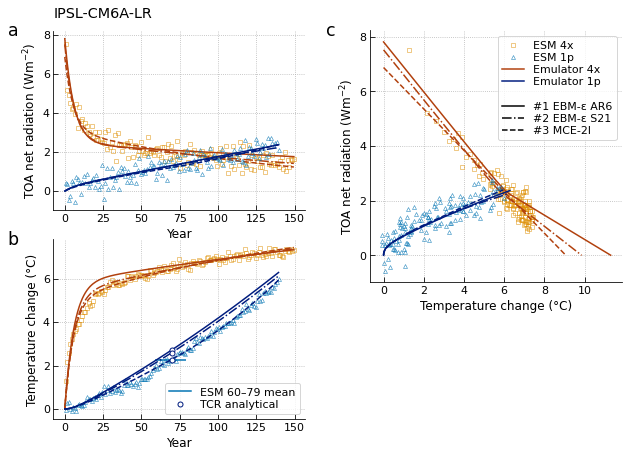

In [83]:
args = (
    df_esm_4x, df_esm_1p, df_irm_4x, df_irm_1p,
    d_tcr_esm, df_parms_calib,
)
source_id = 'IPSL-CM6A-LR'
plt.plot_n_t(source_id, *args)
plt.savefig(f'./image/n-t__{source_id}.png')

### All sources

Plot materials are used based on available data.

In [84]:
# axis limits to be shared

df_min = pd.DataFrame([
    df_esm_4x.min().min(level=1),
    df_esm_1p.min().min(level=1),
    # df_irm_4x.loc[:150].min().min(level=2),
    df_irm_4x.min().min(level=2),
    df_irm_1p.min().min(level=2),
])
df_max = pd.DataFrame([
    df_esm_4x.max().max(level=1),
    df_esm_1p.max().max(level=1),
    # df_irm_4x.loc[:150].max().max(level=2),
    df_irm_4x.max().max(level=2),
    df_irm_1p.max().max(level=2),
])

df_lim = pd.concat([df_min.min(), df_max.max()], axis=1)
d_margin = 0.05 * (df_lim[1] - df_lim[0])
df_lim[0] -= d_margin
df_lim[1] += d_margin

kw = {'map_lim_ext': {k: v.tolist() for k, v in df_lim.iterrows()}}
kw

{'map_lim_ext': {'rtnt': [-2.3501962994081205, 10.811352204733716],
  'tas': [-1.0234550032070597, 14.902681824464956]}}

In [86]:
for source_id in df_parms_calib.index:
    plt.plot_n_t(source_id, *args, **kw)
    plt.savefig(f'./image/n-t__{source_id}.pdf')
    plt.close()

[2024-07-20 11:48:43 mce] INFO:saved to ./image/n-t__ACCESS-CM2.pdf
[2024-07-20 11:48:44 mce] INFO:saved to ./image/n-t__ACCESS-ESM1-5.pdf
[2024-07-20 11:48:44 mce] INFO:saved to ./image/n-t__AWI-CM-1-1-MR.pdf
[2024-07-20 11:48:45 mce] INFO:saved to ./image/n-t__BCC-CSM2-MR.pdf
[2024-07-20 11:48:45 mce] INFO:saved to ./image/n-t__BCC-ESM1.pdf
[2024-07-20 11:48:46 mce] INFO:saved to ./image/n-t__CAMS-CSM1-0.pdf
[2024-07-20 11:48:46 mce] INFO:saved to ./image/n-t__CAS-ESM2-0.pdf
[2024-07-20 11:48:47 mce] INFO:saved to ./image/n-t__CESM2.pdf
[2024-07-20 11:48:47 mce] INFO:saved to ./image/n-t__CESM2-FV2.pdf
[2024-07-20 11:48:48 mce] INFO:saved to ./image/n-t__CESM2-WACCM.pdf
[2024-07-20 11:48:48 mce] INFO:saved to ./image/n-t__CESM2-WACCM-FV2.pdf
[2024-07-20 11:48:49 mce] INFO:saved to ./image/n-t__CIESM.pdf
[2024-07-20 11:48:49 mce] INFO:saved to ./image/n-t__CMCC-CM2-SR5.pdf
[2024-07-20 11:48:50 mce] INFO:saved to ./image/n-t__CNRM-CM6-1.pdf
[2024-07-20 11:48:50 mce] INFO:saved to ./ima

## TCR comparison

In [95]:
# TCR deviations
df = pd.DataFrame({
    k: v.sub(d_tcr_esm) # .quantile([0.05, 0.17, 0.5, 0.83, 0.95])
    for k, v in df_parms_calib['tcr'].items()
})

In [97]:
# Add q2x/q4x in mce-2l
df = pd.concat([
    df,
    df_parms_calib[('q2x', 'mce-2l')]
    .div(df_parms_calib[('q4x', 'mce-2l')])
    .to_frame('factor_2x'),
], axis=1)
df

,ar6,mce-2l,s21,factor_2x
ACCESS-CM2,0.351586,0.149751,0.363820,0.448076
ACCESS-ESM1-5,0.003889,-0.015437,0.001942,0.478109
AWI-CM-1-1-MR,0.062400,0.003935,0.075490,0.469340
BCC-CSM2-MR,0.020025,0.085371,0.079224,0.479869
BCC-ESM1,0.129560,0.006679,0.113029,0.456427
CAMS-CSM1-0,-0.021474,0.028661,-0.079881,0.504259
CAS-ESM2-0,NaN,NaN,NaN,NaN
CESM2,0.314770,-0.059233,0.429980,0.400194
CESM2-FV2,0.133320,-0.065145,0.134577,0.432117
CESM2-WACCM,0.257290,-0.040602,0.250906,0.411175


In [107]:
method_order = ['ar6', 's21', 'mce-2l']

map_color = {
    'ar6': 'C0',
    's21': 'C2',
    'mce-2l': 'C1',
}

map_method = plt.map_method
prob_values = list(plt.map_probability)

[2024-07-20 12:49:52 mce] INFO:saved to ./image/tcr_deviation.png


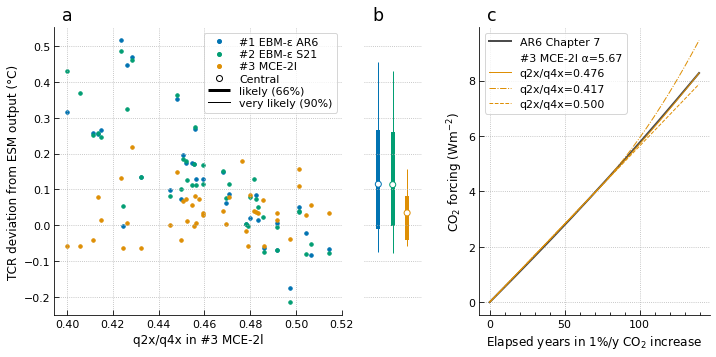

In [115]:
plt.init_general(
    height=4., aspect=1.,
    extend=[
        ('right', -1, {'aspect': 0.2, 'xoff': 0.3}),
        ('right', -1, {'aspect': 0.8}),
    ],
)

ax = plt(0)

namex = 'factor_2x'

for method in method_order:
    df1 = df[[method, namex]].dropna()
    ax.scatter(
        df1[namex], df1[method],
        s=12., c=map_color[method],
    )

handles = [
    mpl.lines.Line2D([0], [0], ls='None', marker='.', ms=8, color=map_color[method])
    for method in method_order
] + [
    mpl.lines.Line2D([0], [0], ls='None', marker='o', mec='k', mfc='w'),
    mpl.lines.Line2D([0], [0], color='k', lw=3., solid_capstyle='butt'),
    mpl.lines.Line2D([0], [0], color='k', lw=1., ls='-'),
]
labels = [map_method[k] for k in method_order] + [
    'Central', 'likely (66%)', 'very likely (90%)',
]
ax.legend(handles, labels, labelspacing=0.2)

ax.set_xlabel('q2x/q4x in {}'.format(map_method['mce-2l']))
ax.set_ylabel('TCR deviation from ESM output (°C)')
ax.grid()

ax = plt(1)

dfq = df.quantile(prob_values)[method_order]
colors = [map_color[method] for method in method_order]

pos = np.arange(len(method_order)) + 0.5
ax.vlines(
    pos, dfq.loc[0.05], dfq.loc[0.95],
    color=colors, lw=1., zorder=1,
)
ax.vlines(
    pos, dfq.loc[0.17], dfq.loc[0.83],
    color=colors, lw=4., zorder=1,
)
ax.scatter(
    pos, dfq.loc[0.50],
    marker='o', facecolor='w', edgecolors=colors,
)
ax.set_xlim(pos[0]-1., pos[-1]+1.)
ax.tick_params(axis='x', labelbottom=False, bottom=False)
ax.tick_params(axis='y', labelleft=False, left=False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(axis='y')

ax = plt(2)

q2x_ref = 3.93 # AR6 WGI 7.3.2.1, Table 7.4
alpha_ref = q2x_ref / np.log(2.)
factor_2x = 0.476
beta_ref = 0.5 / factor_2x
cco2_pi = driver.cco2_pi_1750

driver.forcing.parms.update(
    alpha=alpha_ref,
    beta=beta_ref,
    ccref=cco2_pi,
)

time = np.hstack([0., np.arange(140) + 0.5])
cco2 = cco2_pi * 1.01**time

ax.plot(
    time, driver.forcing.c2erf_ar6('CO2', cco2),
    color='k', alpha=0.7, lw=2, label='AR6 Chapter 7',
)
method = 'mce-2l'
color = map_color[method]
ax.plot(
    time, driver.forcing.c2erf(cco2), ls='-', color=color,
    # label='MCE α={:.2f}, β={:.2f}'.format(alpha_ref, beta_ref),
    label='q2x/q4x={:.3f}'.format(0.5/beta_ref),
)
for i, (beta, ls) in enumerate(zip([1.2, 1.], ['-.', '--'])):
    driver.forcing.parms.update(beta=beta)
    ax.plot(
        time, driver.forcing.c2erf(cco2), ls=ls, color=color,
        # label='MCE α={:.2f}, β={:.2f}'.format(alpha_ref, beta),
        label='q2x/q4x={:.3f}'.format(0.5/beta),
    )

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[:1] + [mpl.patches.Patch(alpha=0, linewidth=0)] + handles[1:],
    labels[:1] + ['{} α={:.2f}'.format(map_method[method], alpha_ref)] + labels[1:],
)
ax.set_xlabel('Elapsed years in 1%/y CO$_2$ increase')
ax.set_ylabel('CO$_2$ forcing (Wm$^{−2}$)')
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.grid()

plt.axis_share(axis='y', axes=[0, 1])
plt.panel_label()

plt.savefig('./image/tcr_deviation.png')